In [285]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import datetime
import random
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Quandl
import numpy as np
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn import tree
from sklearn.grid_search import GridSearchCV

import utils as ut
from utils import RET_PER, FIG_WIDTH, FIG_HEIGHT

sns.set_context("paper")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
hoods = ut.load_hoods()
cities = ut.load_cities()
counties = ut.load_counties()
states = ut.load_states()
indicators = ut.load_indicators()

tar = ut.load_target()
tar_n = ut.load_target(neutral=True)

## increasing values

In [161]:
series = 'IV'
px_us = ut.load_quandl_data('regions', series).ix[:,0]
px_ca = ut.load_quandl_data('states', series).ix[:,0]
px_h = ut.load_quandl_data('hoods', series)

px_h = (px_h
        .fillna(method='bfill', limit=3)
        .fillna(method='ffill', limit=3)
        .dropna(axis=1))

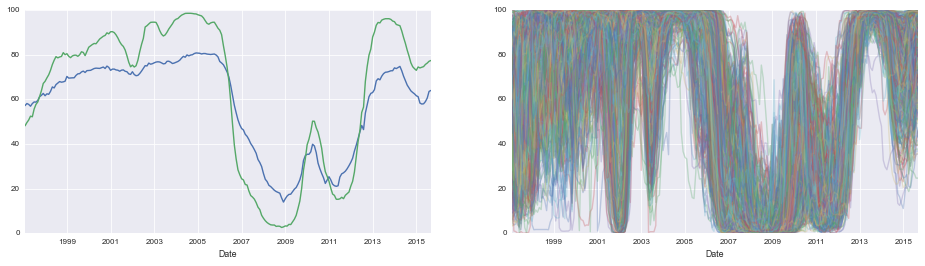

In [162]:
fig, axes = plt.subplots(ncols=2, figsize=(FIG_WIDTH*2, FIG_HEIGHT))

px_us.plot(ax=axes[0])
px_ca.plot(ax=axes[0])
px_h.plot(ax=axes[1], legend=False, alpha=.3)

int: 6.18220627203e-16	coef: 0.543239747314


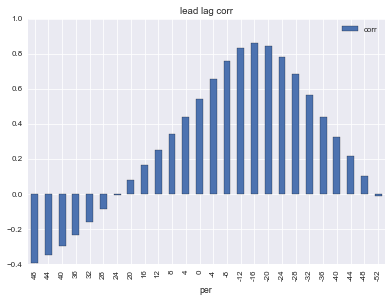

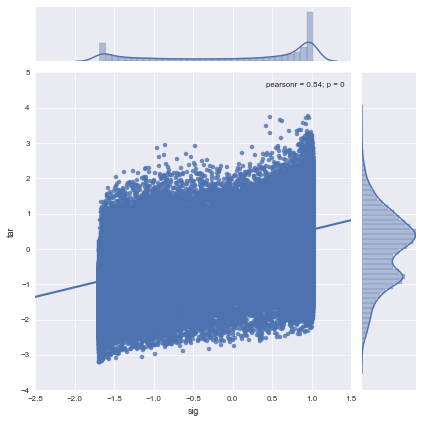

In [168]:
ut.lead_lag_corr(px_h, tar, rng=range(-52,52,4)).plot(kind='bar', title='lead lag corr')

df = ut.stack_and_align([px_h, tar], cols=('sig','tar')).dropna()
df = ut.ts_score(df)
sns.jointplot(df['sig'], df['tar'], kind='reg')

clf = lm.LinearRegression()
clf.fit(df[['sig']], df['tar'])
print('int: {0}\tcoef: {1}'.format(clf.intercept_, clf.coef_[0]))

## decreasing values

In [169]:
series = 'DV'
px_us = ut.load_quandl_data('regions', series).ix[:,0]
px_ca = ut.load_quandl_data('states', series).ix[:,0]
px_h = ut.load_quandl_data('hoods', series)

px_h = (px_h
        .fillna(method='bfill', limit=3)
        .fillna(method='ffill', limit=3)
        .dropna(axis=1))

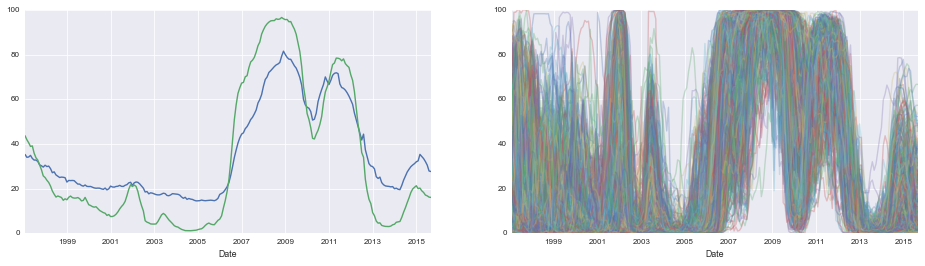

In [170]:
fig, axes = plt.subplots(ncols=2, figsize=(FIG_WIDTH*2, FIG_HEIGHT))
px_us.plot(ax=axes[0])
px_ca.plot(ax=axes[0])
px_h.plot(ax=axes[1], legend=False, alpha=.3)

int: -9.72514953918e-15	coef: -0.539402120121


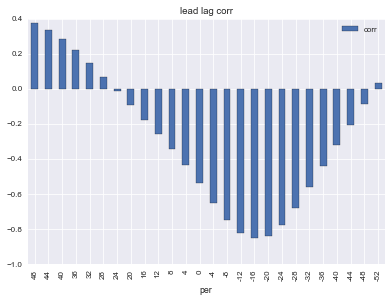

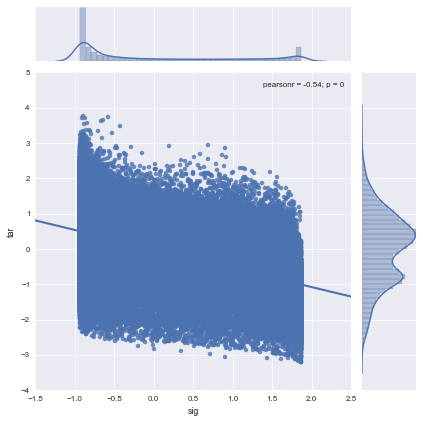

In [171]:
ut.lead_lag_corr(px_h, tar, rng=range(-52,52,4)).plot(kind='bar', title='lead lag corr')

df = ut.stack_and_align([px_h, tar], cols=('sig','tar')).dropna()
df = ut.ts_score(df)
sns.jointplot(df['sig'], df['tar'], kind='reg')

clf = lm.LinearRegression()
clf.fit(df[['sig']], df['tar'])
print('int: {0}\tcoef: {1}'.format(clf.intercept_, clf.coef_[0]))

In [128]:
# df = ut.stack_and_align([ut.load_quandl_data('hoods', 'IV'), ut.load_quandl_data('hoods', 'DV')], cols=('iv', 'dv'))
# df.corr()

## ratio sales price to list price

In [172]:
series = 'SLPR'
px_us = ut.load_quandl_data('regions', series).ix[:,0]
px_ca = ut.load_quandl_data('states', series).ix[:,0]
px_h = ut.load_quandl_data('hoods', series)

px_h = (px_h
        .fillna(method='bfill', limit=3)
        .fillna(method='ffill', limit=3)
        .dropna(axis=1))

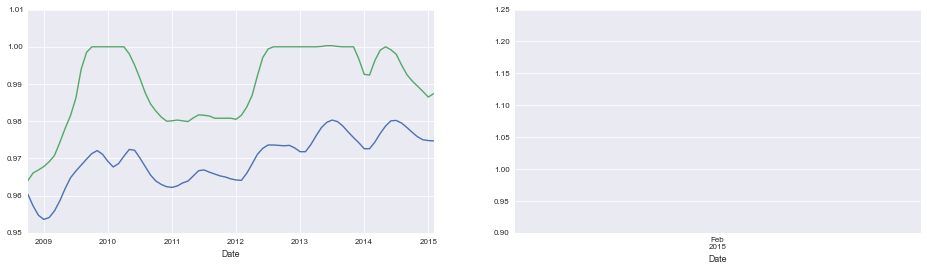

In [173]:
fig, axes = plt.subplots(ncols=2, figsize=(FIG_WIDTH*2, FIG_HEIGHT))
px_us.plot(ax=axes[0])
px_ca.plot(ax=axes[0])
px_h.plot(ax=axes[1], legend=False, alpha=.3)

In [174]:
px_h

,00003,00004,00007,00014,00021,00025,00032,00034,00035,00037,...,01028,01145,01213,01535,01987,02046,02637,04463,04531,05903
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-28,0.9954,0.99,0.9937,0.9801,0.9857,0.9987,0.9783,0.9757,0.9872,1.0667,...,0.9734,0.9812,1,0.9747,0.9699,0.9608,0.993141,1.0821,0.9697,0.9956


## turnover in housing market in past year

In [175]:
series = 'SPY'
px_us = ut.load_quandl_data('regions', series).ix[:,0]
px_ca = ut.load_quandl_data('states', series).ix[:,0]
px_h = ut.load_quandl_data('hoods', series)

px_h = (px_h
        .fillna(method='bfill', limit=3)
        .fillna(method='ffill', limit=3)
        .dropna(axis=1))

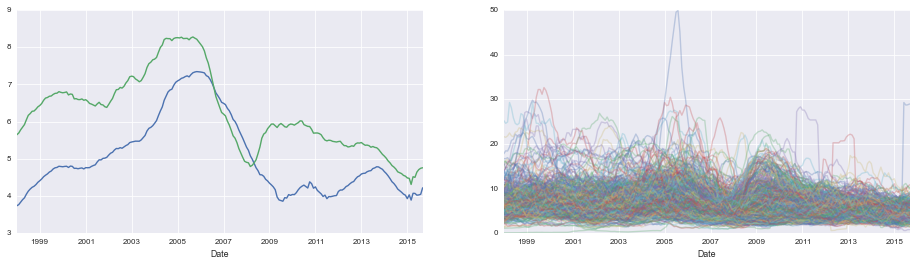

In [176]:
fig, axes = plt.subplots(ncols=2, figsize=(FIG_WIDTH*2, FIG_HEIGHT))
px_us.plot(ax=axes[0])
px_ca.plot(ax=axes[0])
px_h.plot(ax=axes[1], legend=False, alpha=.3)

int: -4.63035810897e-15	coef: 0.12150467813


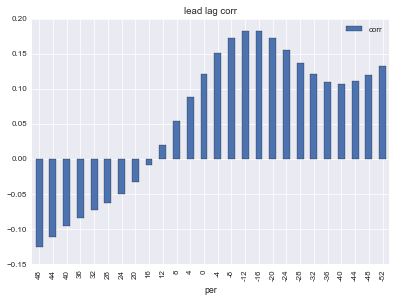

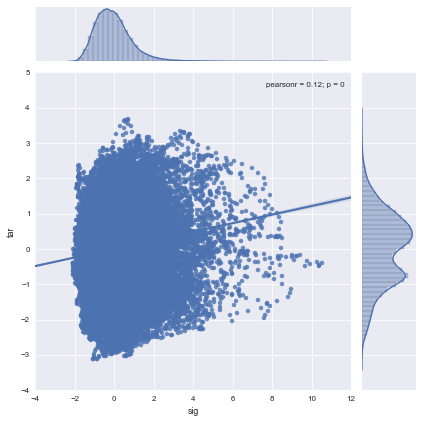

In [177]:
ut.lead_lag_corr(px_h, tar, rng=range(-52,52,4)).plot(kind='bar', title='lead lag corr')

df = ut.stack_and_align([px_h, tar], cols=('sig','tar')).dropna()
df = ut.ts_score(df)
sns.jointplot(df['sig'], df['tar'], kind='reg')

clf = lm.LinearRegression()
clf.fit(df[['sig']], df['tar'])
print('int: {0}\tcoef: {1}'.format(clf.intercept_, clf.coef_[0]))

## sold for gain

In [329]:
series = 'SFG'
px_us = ut.load_quandl_data('regions', series).ix[:,0]
px_ca = ut.load_quandl_data('states', series).ix[:,0]
px_h = ut.load_quandl_data('hoods', series)

px_h = (px_h
        .fillna(method='bfill', limit=3)
        .fillna(method='ffill', limit=3)
        .dropna(axis=1))

In [330]:
per = 12
px_us = px_us / px_us.shift(per) - 1.
px_ca = px_ca / px_ca.shift(per) - 1.
px_h = px_h / px_h.shift(per) - 1.

px_us = px_us.map(lambda x: 3 if x > 3 else x)
px_ca = px_ca.map(lambda x: 3 if x > 3 else x)
px_h = px_h.applymap(lambda x: 3 if x > 3 else x)

SFG_c = px_h

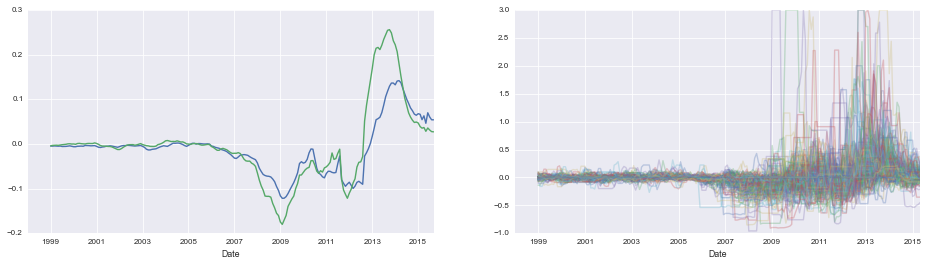

In [331]:
fig, axes = plt.subplots(ncols=2, figsize=(FIG_WIDTH*2, FIG_HEIGHT))
px_us.plot(ax=axes[0])
px_ca.plot(ax=axes[0])
px_h.plot(ax=axes[1], legend=False, alpha=.3)

int: 4.45931763155e-15	coef: 0.158829595428


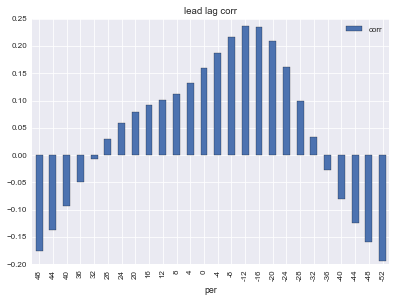

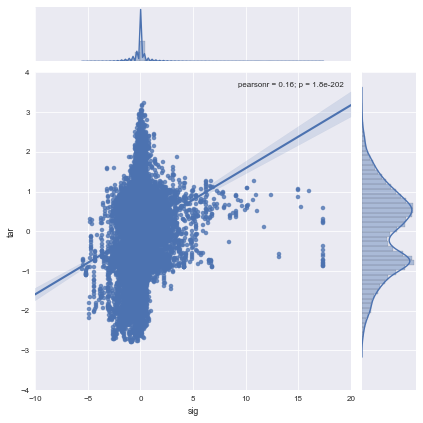

In [332]:
ut.lead_lag_corr(px_h, tar, rng=range(-52,52,4)).plot(kind='bar', title='lead lag corr')

df = ut.stack_and_align([px_h, tar], cols=('sig','tar')).dropna()
df = ut.ts_score(df)
sns.jointplot(df['sig'], df['tar'], kind='reg')

clf = lm.LinearRegression()
clf.fit(df[['sig']], df['tar'])
print('int: {0}\tcoef: {1}'.format(clf.intercept_, clf.coef_[0]))

## build model

In [341]:
features = {}
for i in ('IV', 'DV', 'SPY'):
    features[i] = ut.load_quandl_data('hoods', i)
features['tar'] = tar
features['SFG'] = SFG_c
df = ut.stack_and_align(features.values(), cols=features.keys()).dropna()
df = ut.ts_score(df)

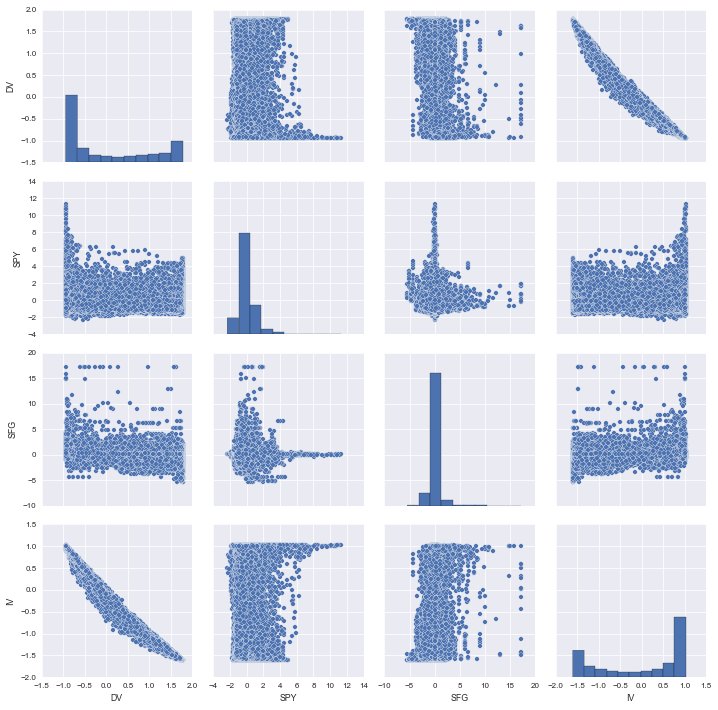

In [342]:
sns.pairplot(df[[c for c in df.columns if c != 'tar']])

r2: 0.314691539164	int: 5.48390071518e-15	coef: [-0.15347403 -0.05521668  0.0242522   0.4020261 ]	alpha: 1000


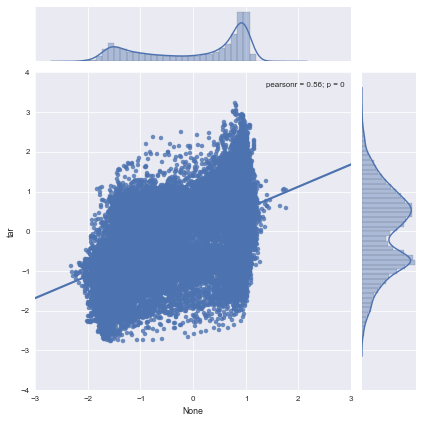

In [350]:
clf = lm.RidgeCV(alphas=[1., 10., 100, 1000, 10000, 50000, 10000000], cv=5)
clf.fit(df[[c for c in df.columns if c != 'tar']], df['tar'])
s = pd.Series(ut.ts_score(clf.predict(df[[c for c in df.columns if c != 'tar']])), index=df.index)
sns.jointplot(s, df['tar'], kind='reg')
score = clf.score(df[[c for c in df.columns if c != 'tar']], df['tar'])
print('r2: {2}\tint: {0}\tcoef: {1}\talpha: {3}'.format(clf.intercept_, clf.coef_, score, clf.alpha_))

r2: 0.316371468784	int: 4.83388173451e-15	coef: [-0.         -0.04873585  0.01589749  0.55641148]	alpha: 0.01


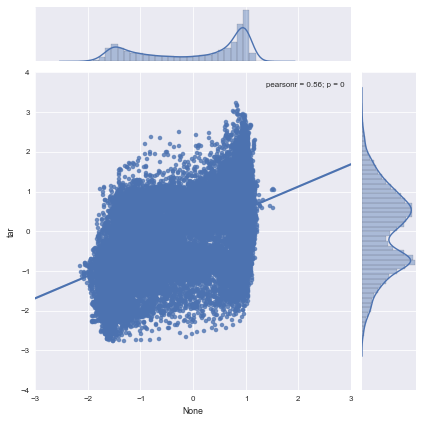

In [348]:
clf = lm.LassoCV(alphas=[.0001, .001, .01, .1], cv=5)
clf.fit(df[[c for c in df.columns if c != 'tar']], df['tar'])
s = pd.Series(ut.ts_score(clf.predict(df[[c for c in df.columns if c != 'tar']])), index=df.index)
sns.jointplot(s, df['tar'], kind='reg')
score = clf.score(df[[c for c in df.columns if c != 'tar']], df['tar'])
print('r2: {2}\tint: {0}\tcoef: {1}\talpha: {3}'.format(clf.intercept_, clf.coef_, score, clf.alpha_))

r2: 0.328264788289


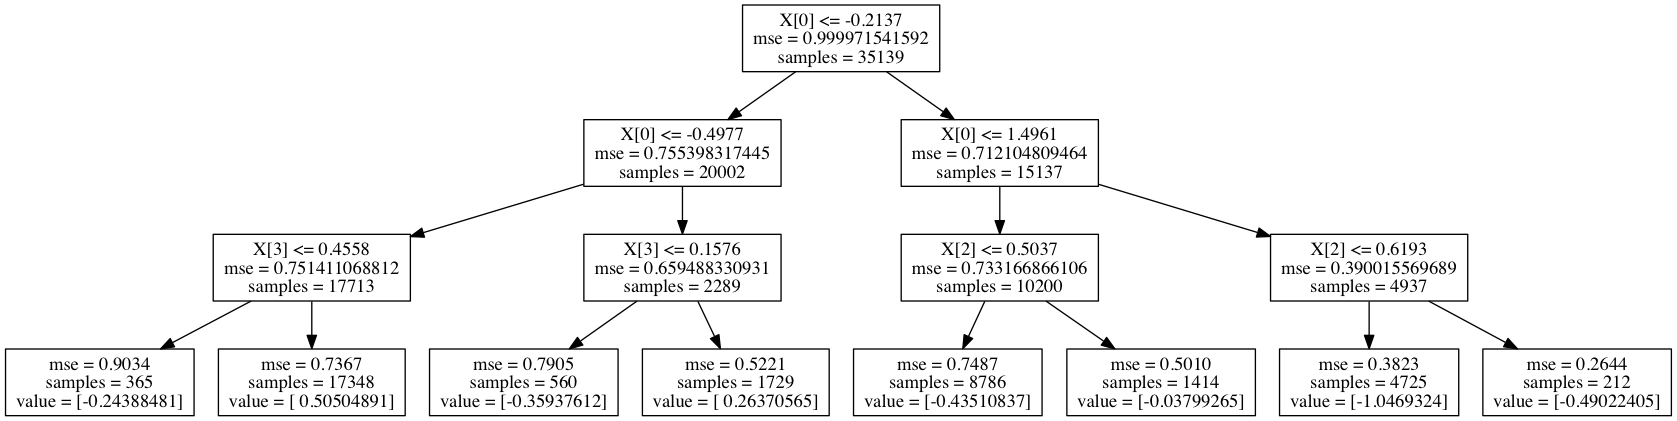

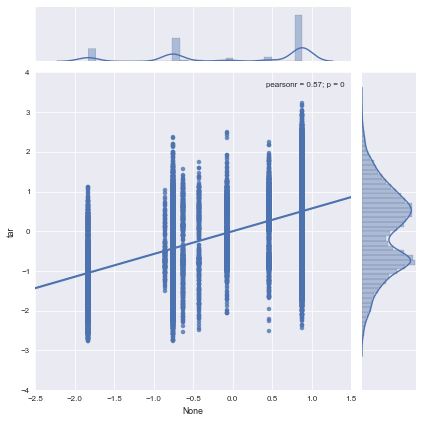

In [349]:
clf = GridSearchCV(tree.DecisionTreeRegressor(), param_grid={'max_depth': [3,5,7], 'max_features': [None, 1, 2]}, cv=5)
clf.fit(df[[c for c in df.columns if c != 'tar']], df['tar'])
s = pd.Series(ut.ts_score(clf.predict(df[[c for c in df.columns if c != 'tar']])), index=df.index)
sns.jointplot(s, df['tar'], kind='reg')
score = clf.score(df[[c for c in df.columns if c != 'tar']], df['tar'])
print('r2: {0}'.format(score,))
ut.tree_vis(clf.best_estimator_)